<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Seaborn-Visualisation-of-Flight-Data" data-toc-modified-id="Seaborn-Visualisation-of-Flight-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Seaborn Visualisation of Flight Data</a></span></li><li><span><a href="#Distribution-of-coach-price" data-toc-modified-id="Distribution-of-coach-price-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Distribution of coach price</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-coach-price-for-specific-flight-times" data-toc-modified-id="Distribution-of-coach-price-for-specific-flight-times-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Distribution of coach price for specific flight times</a></span></li></ul></li><li><span><a href="#Distribution-of-delay-times" data-toc-modified-id="Distribution-of-delay-times-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Distribution of delay times</a></span></li><li><span><a href="#Coach-vs-First-Class-price" data-toc-modified-id="Coach-vs-First-Class-price-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Coach vs First Class price</a></span><ul class="toc-item"><li><span><a href="#Coach-price-for-flights-with/without-meal" data-toc-modified-id="Coach-price-for-flights-with/without-meal-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Coach price for flights with/without meal</a></span></li><li><span><a href="#Coach-price-for-flights-with/without-in-flight-entertainment" data-toc-modified-id="Coach-price-for-flights-with/without-in-flight-entertainment-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Coach price for flights with/without in-flight entertainment</a></span></li></ul></li><li><span><a href="#Distribution-of-number-of-passengers-for-different-flight-times" data-toc-modified-id="Distribution-of-number-of-passengers-for-different-flight-times-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Distribution of number of passengers for different flight times</a></span><ul class="toc-item"><li><span><a href="#Flight-price-during-the-week-vs-weekend" data-toc-modified-id="Flight-price-during-the-week-vs-weekend-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Flight price during the week vs weekend</a></span></li><li><span><a href="#Distribution-of-coach-price-for-flights-through-the-week" data-toc-modified-id="Distribution-of-coach-price-for-flights-through-the-week-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Distribution of coach price for flights through the week</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

# Seaborn Visualisation of Flight Data

This project uses data collected for ~130,000 flights in the United States.

The aim of this project is to use Seaborn to make simple but insightful visualisations of the data using different plot types.

In [2]:
flight = pd.read_csv("flights.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


In [3]:
len(flight)

129780

In [4]:
print(np.mean(flight.coach_price))
print(np.median(flight.coach_price))

376.58525308213905
380.56


# Distribution of coach price

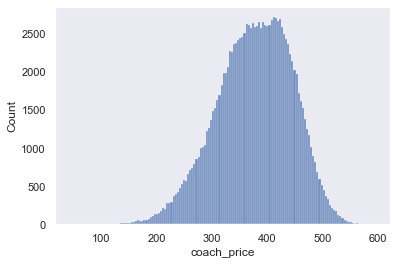

<Figure size 432x288 with 0 Axes>

In [5]:
sns.set(style='dark')

sns.histplot(flight.coach_price)
plt.show()
plt.clf()

In [6]:
print(np.mean(flight.coach_price[flight.hours == 8]))
print(np.median(flight.coach_price[flight.hours == 8]))

431.834377372817
437.115


## Distribution of coach price for specific flight times

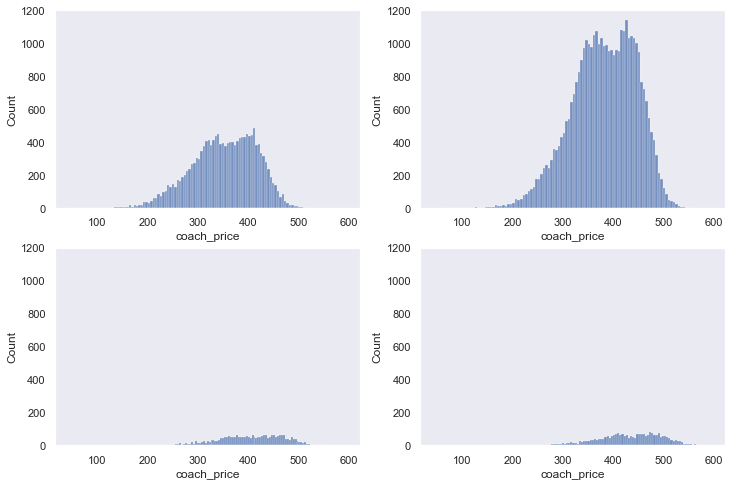

<Figure size 432x288 with 0 Axes>

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

ax1 = plt.subplot(2, 2, 1)
ax1 = sns.histplot(flight.coach_price[flight.hours == 2], bins=100)

ax2 = plt.subplot(2, 2, 2, sharex=ax1, sharey=ax1)
ax2 = sns.histplot(flight.coach_price[flight.hours == 4], bins=100)

ax3 = plt.subplot(2, 2, 3, sharex=ax1, sharey=ax1)
ax3 = sns.histplot(flight.coach_price[flight.hours == 6], bins=100)

ax4 = plt.subplot(2, 2, 4, sharex=ax1, sharey=ax1)
ax4 = sns.histplot(flight.coach_price[flight.hours == 8], bins=100)

plt.show()
plt.clf()

# Distribution of delay times

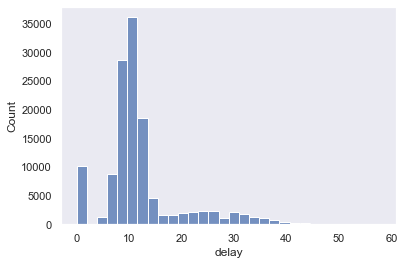

<Figure size 432x288 with 0 Axes>

In [8]:
sns.histplot(flight.delay[flight.delay <=500], bins=30)
plt.show()
plt.clf()

# Coach vs First Class price

In [9]:
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

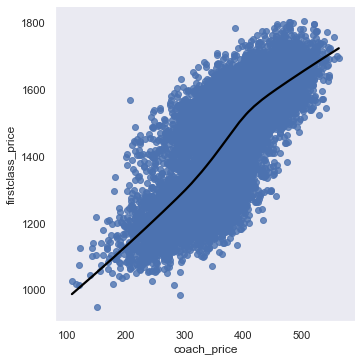

<Figure size 432x288 with 0 Axes>

In [10]:
# use lmplot to include a regression line via the `lowess = True` parameter
# this calculates the regression line using statsmodel, which was imported at the top of the notebook
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

## Coach price for flights with/without meal

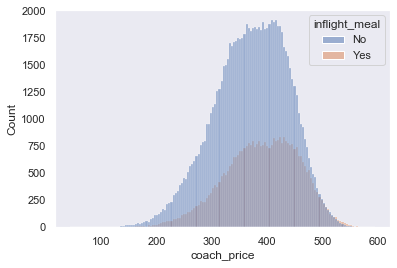

<Figure size 432x288 with 0 Axes>

In [11]:
# Inflight Meals
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.show()
plt.clf()

## Coach price for flights with/without in-flight entertainment

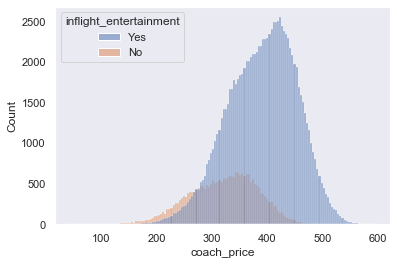

<Figure size 432x288 with 0 Axes>

In [12]:
# Inflight Entertainment
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()

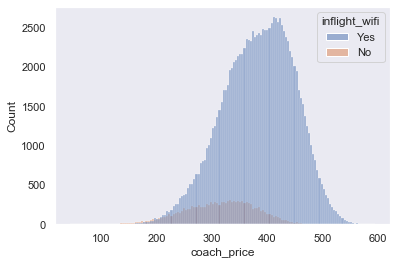

<Figure size 432x288 with 0 Axes>

In [13]:
# Inflight WiFi
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()
plt.clf()

# Distribution of number of passengers for different flight times

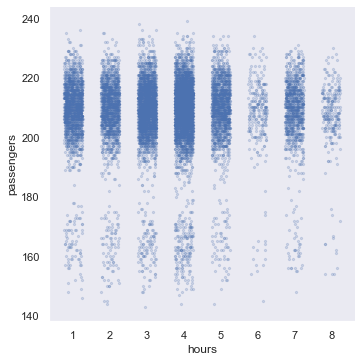

<Figure size 432x288 with 0 Axes>

In [14]:
sns.lmplot(x = "hours", y = "passengers",\
           data = flight_sub,\
           x_jitter = 0.25,\
           scatter_kws={"s": 5, "alpha":0.2},\
           fit_reg = False)
plt.show()
plt.clf()

## Flight price during the week vs weekend

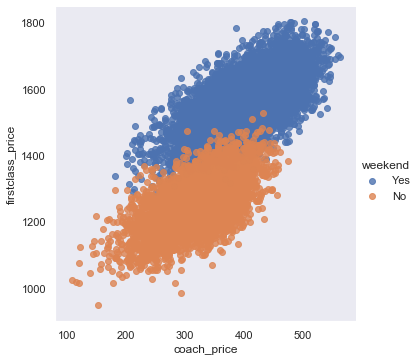

<Figure size 432x288 with 0 Axes>

In [15]:
sns.lmplot(x ='coach_price', y='firstclass_price', hue = 'weekend', data = flight_sub, fit_reg= False)
plt.show()
plt.clf()

## Distribution of coach price for flights through the week

Comparing redeye flights to normal flights. Would expect that redeye flights would consistently be cheaper due to their less desirable flight times.

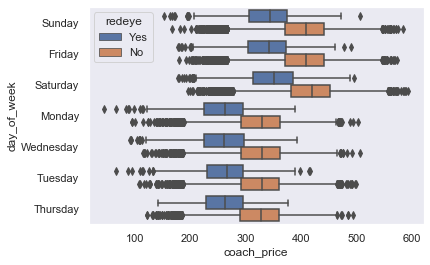

<Figure size 432x288 with 0 Axes>

In [16]:
sns.boxplot(x = "coach_price", y = "day_of_week", hue = "redeye", data = flight)
plt.show()
plt.clf()